Due: September 27, 2024
# Some notes:
1. Please remember to run all your code and save your ipynb file that way before
committing to github.
2. Please clearly label your file name and upload each lab/homework to it’s own folder/file
in github - don’t upload a lab in another lab’s folder. Makes it harder to find.
3. Please remember to print every relevant output - jupyter may output the results anyway
but generally IDEs won’t, and even in notebooks sometimes the formatting can be better
if explicitly printed.
4. Please do your own work - copy/pasting or submitting the same file as someone else will
not help you. Copying directly from ChatGPT will also not help you - use it for
debugging not your whole assignments.

# Questions:
1. Print the correlation matrix for the data and plot the variable PhD. 1pt.
2. Estimate a logistic regression with the predicted variable being Private, and the predictors
being all other variables in the dataset. 1pt.
Hint: 'Unnamed: 0' is a string variable - needs to be dropped, also be careful about not
including the same variable on both sides of the equation.
3. Print the predicted values for the first 10 observations, create a confusion table from the
regression, and note how accurate the model is. 1.5 pt.
4. Now we will try to train and test the same model instead. Train the same model on the
first 527 observations, and estimate the probability for the 528-777th observations. Print
the model, and the predictions for the test data. 1.5pt.
If you have any questions, please feel free to email me or Jing! Always happy to help.


In [37]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
import pandas as pd
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 3
df = pd.read_csv('College.csv')
df
print(df.columns)

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate'],
      dtype='object')


In [38]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [39]:
# 1.1
df.corr(numeric_only=True)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061


<Axes: >

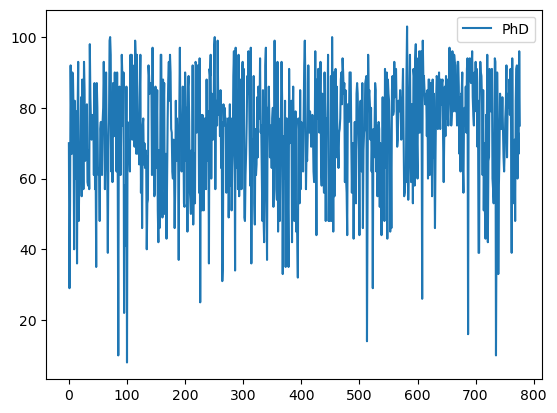

In [40]:
# 1.2
df.plot(y='PhD')

In [41]:
# df[df.Private == 'Ye']

In [48]:
# 2. Estimate a logistic regression with the predicted variable being Private, and the predictors
# being all other variables in the dataset. 1pt.
# Hint: 'Unnamed: 0' is a string variable - needs to be dropped, also be careful about not
# including the same variable on both sides of the equation.
all_vars = df.columns.drop(['Private', 'Unnamed: 0'])
model = MS(all_vars)
X = model.fit_transform(df)
y = df.Private.map({'Yes': 1, 'No': 0})
glm = sm.GLM(y, X, family=sm.families.Binomial())
result = glm.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                Private   No. Observations:                  777
Model:                            GLM   Df Residuals:                      759
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -119.75
Date:                Fri, 27 Sep 2024   Deviance:                       239.50
Time:                        17:43:21   Pearson chi2:                 8.53e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5785
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -0.0257      1.860     -0.014      

In [50]:
# 3. Print the predicted values for the first 10 observations, create a confusion table from the
# regression, and note how accurate the model is. 1.5 pt.
# probs = result.predict()
# print(probs[:10])
probs = result.predict()
print(probs[:10])

# Use NumPy array with dtype=object to avoid truncation
labels = np.array(["No"] * len(probs), dtype=object)
print(labels[:10])

# Update labels where the predicted probabilities are greater than 0.5
labels[probs > 0.5] = "Yes"
print(labels[:10])

# Confusion table as before
confusion_table(labels, df.Private)

[0.48741812 0.99993409 0.99800488 0.99978412 0.86555933 0.99914302
 0.99518713 0.99800404 0.99971288 0.99928854]
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
['No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']


Truth,No,Yes
Predicted,,
No,191,22
Yes,21,543


In [53]:
# test accuracy is as follows.
(191+543)/(21+22+191+543),np.mean(labels == df.Private)

(0.9446589446589446, 0.9446589446589446)

In [47]:
# 4. Now we will try to train and test the same model instead. Train the same model on the
# first 527 observations, and estimate the probability for the 528-777th observations. Print
# the model, and the predictions for the test data. 1.5pt.

train = (df.index<527)
df_train = df.loc[train]
df_test = df.loc[~train]
print(df_test.shape)
X_train, X_test = X.loc[train], X.loc[~train]
y_train, y_test = y.loc[train], y.loc[~train]


glm_train = sm.GLM(y_train, X_train, family= sm.families.Binomial())

result = glm_train.fit()
print(result.summary())
probs = result.predict(exog=X_test)
print(probs)


(250, 19)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                Private   No. Observations:                  527
Model:                            GLM   Df Residuals:                      509
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -58.004
Date:                Fri, 27 Sep 2024   Deviance:                       116.01
Time:                        17:43:14   Pearson chi2:                     290.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5231
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       2.9146      2.672      1